In [22]:
# SMS Phishing Dataset Basic Inspection
# This notebook performs basic inspection of the SMS dataset and maps labels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)


In [23]:
# Load the dataset
df = pd.read_csv('Cleaned_SMS_Spam_Dataset.csv')

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")


Dataset loaded successfully!
Shape: (5572, 2)
Columns: ['label', 'message']


In [24]:
# Basic dataset inspection
print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print()

print("=== COLUMN INFORMATION ===")
print(df.info())
print()

print("=== FIRST 5 ROWS ===")
display(df.head())


=== DATASET OVERVIEW ===
Dataset shape: (5572, 2)
Number of rows: 5572
Number of columns: 2

=== COLUMN INFORMATION ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None

=== FIRST 5 ROWS ===


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
# Check for missing values
print("=== MISSING VALUES ===")
print(df.isnull().sum())
print()

print("=== LABEL DISTRIBUTION ===")
print("Value counts:")
print(df['label'].value_counts())
print()
print("Percentage distribution:")
print(df['label'].value_counts(normalize=True) * 100)


=== MISSING VALUES ===
label      0
message    0
dtype: int64

=== LABEL DISTRIBUTION ===
Value counts:
label
ham     4825
spam     747
Name: count, dtype: int64

Percentage distribution:
label
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64


<Figure size 1000x600 with 0 Axes>

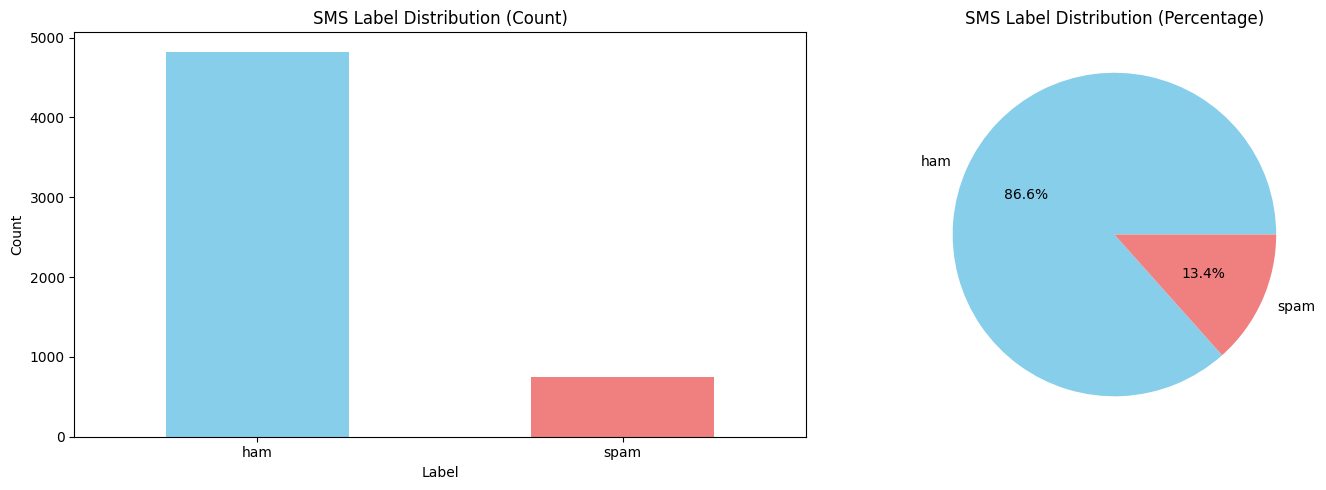

In [26]:
# Visualize label distribution
plt.figure(figsize=(10, 6))

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Count plot
df['label'].value_counts().plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'])
ax1.set_title('SMS Label Distribution (Count)')
ax1.set_xlabel('Label')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=0)

# Pie chart
df['label'].value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
ax2.set_title('SMS Label Distribution (Percentage)')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()


In [27]:
# Message length analysis
df['message_length'] = df['message'].str.len()

print("=== MESSAGE LENGTH STATISTICS ===")
print(df['message_length'].describe())
print()

print("=== MESSAGE LENGTH BY LABEL ===")
print(df.groupby('label')['message_length'].describe())


=== MESSAGE LENGTH STATISTICS ===
count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: message_length, dtype: float64

=== MESSAGE LENGTH BY LABEL ===
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam    747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0


In [28]:
# Sample messages by label
print("=== SAMPLE HAM MESSAGES ===")
ham_samples = df[df['label'] == 'ham']['message'].head(3)
for i, msg in enumerate(ham_samples, 1):
    print(f"{i}. {msg}")
print()

print("=== SAMPLE SPAM MESSAGES ===")
spam_samples = df[df['label'] == 'spam']['message'].head(3)
for i, msg in enumerate(spam_samples, 1):
    print(f"{i}. {msg}")


=== SAMPLE HAM MESSAGES ===
1. Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
2. Ok lar... Joking wif u oni...
3. U dun say so early hor... U c already then say...

=== SAMPLE SPAM MESSAGES ===
1. Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
2. FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
3. WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.


In [29]:
# ===== LABEL MAPPING =====
# Map ham -> 0, spam -> 1
print("=== LABEL MAPPING ===")
print("Original label distribution:")
print(df['label'].value_counts())
print()

# Create the mapping
label_mapping = {'ham': 0, 'spam': 1}
df['label_encoded'] = df['label'].map(label_mapping)

print("After mapping (ham -> 0, spam -> 1):")
print(df['label_encoded'].value_counts())
print()

# Verify the mapping
print("=== MAPPING VERIFICATION ===")
mapping_check = df[['label', 'label_encoded']].drop_duplicates().sort_values('label_encoded')
print(mapping_check)


=== LABEL MAPPING ===
Original label distribution:
label
ham     4825
spam     747
Name: count, dtype: int64

After mapping (ham -> 0, spam -> 1):
label_encoded
0    4825
1     747
Name: count, dtype: int64

=== MAPPING VERIFICATION ===
  label  label_encoded
0   ham              0
2  spam              1


In [30]:
# Final dataset overview with encoded labels
print("=== FINAL DATASET OVERVIEW ===")
print(f"Dataset shape: {df.shape}")
print()
print("Columns:")
for col in df.columns:
    print(f"- {col}")
print()

print("=== SAMPLE OF FINAL DATA ===")
display(df[['label', 'label_encoded', 'message', 'message_length']].head(10))


=== FINAL DATASET OVERVIEW ===
Dataset shape: (5572, 4)

Columns:
- label
- message
- message_length
- label_encoded

=== SAMPLE OF FINAL DATA ===


,label,label_encoded,message,message_length
0,ham,0,"Go until jurong point, crazy.. Available only ...",111
1,ham,0,Ok lar... Joking wif u oni...,29
2,spam,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,0,U dun say so early hor... U c already then say...,49
4,ham,0,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,1,FreeMsg Hey there darling it's been 3 week's n...,148
6,ham,0,Even my brother is not like to speak with me. ...,77
7,ham,0,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,1,WINNER!! As a valued network customer you have...,158
9,spam,1,Had your mobile 11 months or more? U R entitle...,154


In [31]:
# Create final dataset with only encoded label and message
print("=== CREATING FINAL DATASET ===")
phishing_sms_dataset = df[['label_encoded', 'message']].copy()
phishing_sms_dataset.rename(columns={'label_encoded': 'label'}, inplace=True)

print("Final dataset created with columns:")
print(f"- label: {phishing_sms_dataset['label'].dtype} (0=ham, 1=spam)")
print(f"- message: {phishing_sms_dataset['message'].dtype}")
print(f"Shape: {phishing_sms_dataset.shape}")
print()

print("=== FINAL DATASET SAMPLE ===")
display(phishing_sms_dataset.head(10))
print()

print("=== FINAL LABEL DISTRIBUTION ===")
print(phishing_sms_dataset['label'].value_counts().sort_index())

print("=== SUMMARY ===")
print("✓ Dataset loaded successfully")
print("✓ Basic inspection completed")
print("✓ Label encoding completed (ham=0, spam=1)")
print("✓ Final dataset 'phishing_sms_dataset' created")
print()
print("Key findings:")
print(f"- Total messages: {len(phishing_sms_dataset)}")
print(f"- Ham messages (0): {len(phishing_sms_dataset[phishing_sms_dataset['label'] == 0])} ({len(phishing_sms_dataset[phishing_sms_dataset['label'] == 0])/len(phishing_sms_dataset)*100:.1f}%)")
print(f"- Spam messages (1): {len(phishing_sms_dataset[phishing_sms_dataset['label'] == 1])} ({len(phishing_sms_dataset[phishing_sms_dataset['label'] == 1])/len(phishing_sms_dataset)*100:.1f}%)")
print()


=== CREATING FINAL DATASET ===
Final dataset created with columns:
- label: int64 (0=ham, 1=spam)
- message: object
Shape: (5572, 2)

=== FINAL DATASET SAMPLE ===


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...



=== FINAL LABEL DISTRIBUTION ===
label
0    4825
1     747
Name: count, dtype: int64
=== SUMMARY ===
✓ Dataset loaded successfully
✓ Basic inspection completed
✓ Label encoding completed (ham=0, spam=1)
✓ Final dataset 'phishing_sms_dataset' created

Key findings:
- Total messages: 5572
- Ham messages (0): 4825 (86.6%)
- Spam messages (1): 747 (13.4%)



In [32]:
if False:
    phishing_sms_dataset.to_csv('phishing_sms_dataset.csv', index=False)
    print("Dataset saved to phishing_sms_dataset.csv")